Use logistic regression to build a model to classify the breast cancer dataset  Divide the dataset
into training and testing in the ratio 70:30 . Print the confusion matrix, sensitivity, specificity. For
each iteration of training, store the training and testing accuracy. Plot a graph showing training
and testing accuracy Vs iteration no. Do not use sklearn logistic function

C:\Users\yabh3\AppData\Local\Temp\ipykernel_22284\1633987365.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Confusion Matrix:
[[61.  2.]
 [10. 98.]]
Sensitivity: 0.9074074074074074
Specificity: 0.9682539682539683


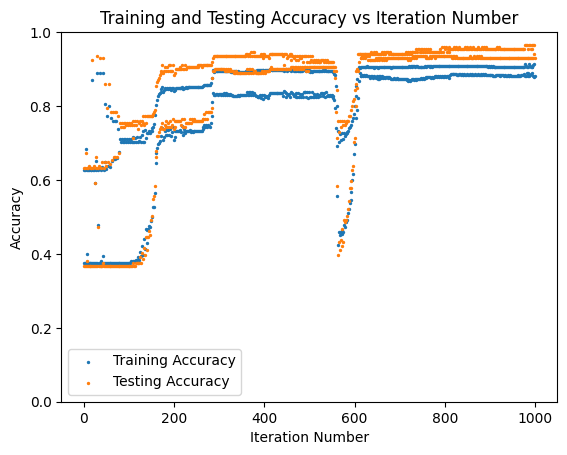

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        self.training_accuracy = []
        self.testing_accuracy = []

        for i in range(self.num_iterations):
            # Forward propagation
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            # Backward propagation
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate training and testing accuracy
            train_accuracy = self.accuracy(X_train, y_train)
            test_accuracy = self.accuracy(X_test, y_test)
            self.training_accuracy.append(train_accuracy)
            self.testing_accuracy.append(test_accuracy)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return sigmoid(z)

    def accuracy(self, X, y):
        y_pred = np.round(self.predict(X))
        return np.mean(y_pred == y)

# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
conf_matrix = np.zeros((2, 2))
for true, pred in zip(y_test, np.round(y_pred)):
    conf_matrix[int(true), int(pred)] += 1

# Calculate sensitivity and specificity
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Confusion Matrix:")
print(conf_matrix)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Plot training and testing accuracy vs iteration number
plt.scatter(range(model.num_iterations), model.training_accuracy, label='Training Accuracy',s=2)
plt.scatter(range(model.num_iterations), model.testing_accuracy, label='Testing Accuracy',s=2)
# plt.scatter(range(100), model.training_accuracy[:100], label='Training Accuracy',s=2)
# plt.scatter(range(100), model.testing_accuracy[:100], label='Testing Accuracy',s=2)
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Iteration Number')
plt.ylim(0,1)
plt.legend()
plt.show()
